>  # 🚗 Used Car DataSet

## 📌 Dataset Description
This dataset represents a sample of **used car listings** collected from different cities in India. It contains detailed specifications, ownership information, and pricing data, making it suitable for **data analysis, price prediction, and exploratory data analysis (EDA)** tasks.

Each row corresponds to a **single car listing**, while each column captures a specific attribute of that car.

---

## 📊 Data Dictionary

| Column Name | Description |
|------------|------------|
| **Name** | Full model name and variant of the car |
| **Location** | City where the car is listed for sale |
| **Year** | Manufacturing year of the vehicle |
| **Kilometers_Driven** | Total distance driven by the car (in kilometers) |
| **Fuel_Type** | Type of fuel used (Petrol, Diesel, CNG, etc.) |
| **Transmission** | Gear system of the car (Manual / Automatic) |
| **Owner_Type** | Ownership history (First, Second, etc.) |
| **Mileage** | Fuel efficiency (kmpl or km/kg for CNG) |
| **Engine** | Engine displacement in cubic centimeters (CC) |
| **Power** | Engine power output measured in brake horsepower (bhp) |
| **Seats** | Number of seating positions in the vehicle |
| **Price** | Selling price of the car (in Lakhs) |
| **Cars** | Car brand and base model name |

> ## I. Introduction

In the automotive industry, the price of a **new car** is generally determined by the manufacturer, with additional costs imposed by government regulations and taxes. This pricing structure provides transparency and confidence for buyers. However, the continuous rise in new car prices, combined with limited financial resources, has led to a significant **global growth in the used car market**.

As the demand for used cars increases, accurately estimating their prices has become a **critical challenge**. Unlike new cars, used car prices are highly variable and often subjective, making customers vulnerable to unfair or unrealistic pricing. This highlights the necessity of developing a **data-driven used car price prediction system** that can objectively estimate a vehicle’s value.

In modern markets, particularly in developed countries, cars are frequently acquired through **leasing agreements**. After the lease period ends, these vehicles re-enter the market as used cars, further increasing supply and reinforcing the importance of reliable price estimation models.

From a **Data Science and Machine Learning perspective**, predicting used car prices is a complex regression problem. The price of a used car depends on a wide range of features, including:
- Vehicle age  
- Brand and model  
- Manufacturer origin  
- Mileage  
- Engine power  

Economic factors such as rising fuel costs make **fuel efficiency** an increasingly influential attribute. Additional technical and physical characteristics—such as fuel type, engine capacity (CC), braking system, acceleration, number of doors, safety ratings, size, and weight—also play a significant role.

Furthermore, optional features and qualitative aspects, including interior comfort, infotainment systems, navigation support, exterior appearance, and consumer reviews, can substantially impact market value.

This project aims to leverage **machine learning techniques** to analyze these features and build a predictive model capable of estimating used car prices accurately. Such a system can assist buyers, sellers, and dealerships in making informed, fair, and data-driven decisions.





# II. DATA SET AND PREPROCESSING

We use dataset from Kaggle for used car price prediction. The dataset contains various features that are required to predict and classify the range of prices of used cars.





**Firstly, we imported some basic Libraries.**

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

**Libraries for ML**

In [2]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
!pip install catboost
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/ML Pro/Regression/train-data.csv')
test = pd.read_csv('/content/drive/MyDrive/ML Pro/Regression/test-data.csv')

In [5]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [9]:
data.shape


(6019, 14)

In [10]:
test.shape

(1234, 13)

In [11]:
data.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


In [12]:
data.isnull().mean()

,0
Unnamed: 0,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.000332
Engine,0.005981


In [13]:
test.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,10


In [14]:
test.isnull().mean()

,0
Unnamed: 0,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.000000
Engine,0.008104


In [15]:
print(data['Location'].unique())
print(data['Fuel_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


Let's drop the 'New_Price' and 'Unnamed:0' columns.

In [16]:
data = data.drop('New_Price', axis=1)
data = data.drop('Unnamed: 0', axis=1)

test = test.drop('New_Price', axis=1)
test = test.drop('Unnamed: 0', axis=1)

And, drop all NaN data.

In [17]:
data = data.dropna(how='any')
test = test.dropna(how='any')

In [18]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [19]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [20]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [21]:
test.describe()

,Year,Kilometers_Driven,Seats
count,1223.000000,1223.000000,1223.000000
mean,2013.412101,58423.957482,5.284546
std,3.177548,35565.435199,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54407.000000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [22]:
data.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,5975,5975,5975,5975,5975,5975,5975,5975
unique,1855,11,4,2,4,442,145,371
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp
freq,49,784,3195,4266,4903,172,606,235


In [23]:
test.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,1223,1223,1223,1223,1223,1223,1223,1223
unique,759,11,4,2,4,301,104,249
top,Maruti Alto LXi,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp
freq,9,159,643,897,1018,35,126,45


In [24]:
data.shape

(5975, 12)

In [25]:
test.shape

(1223, 11)

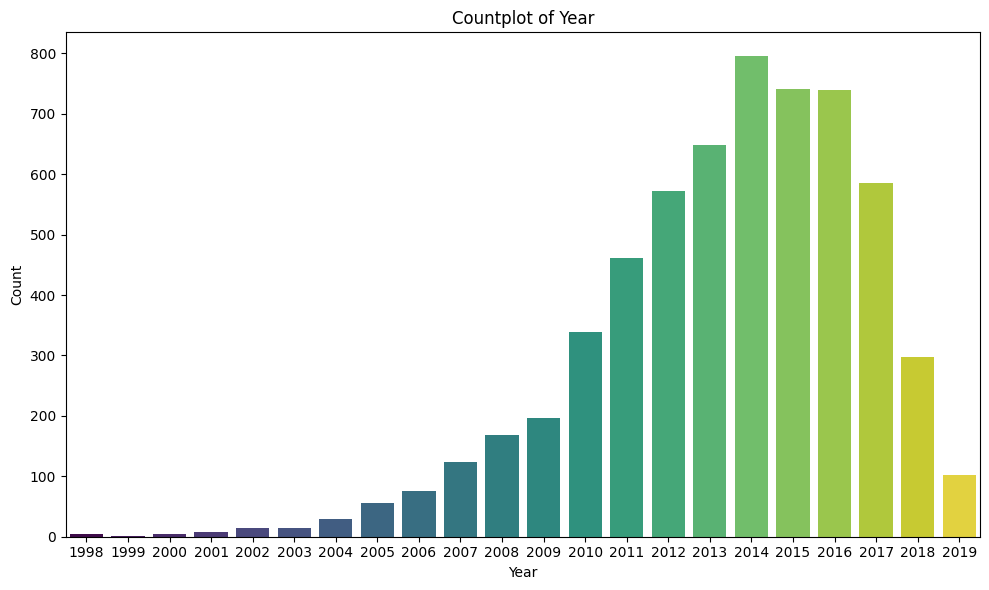

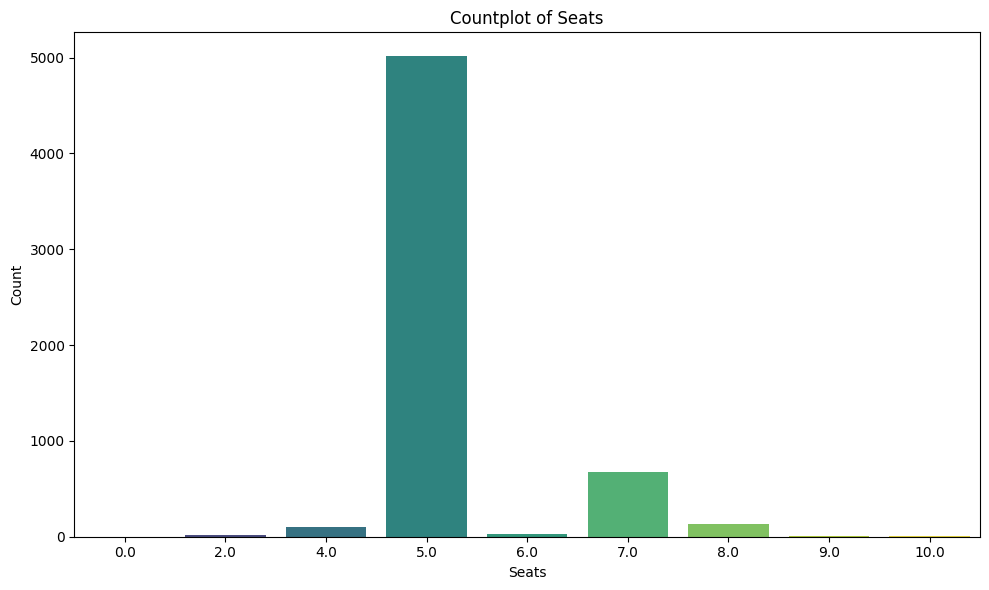

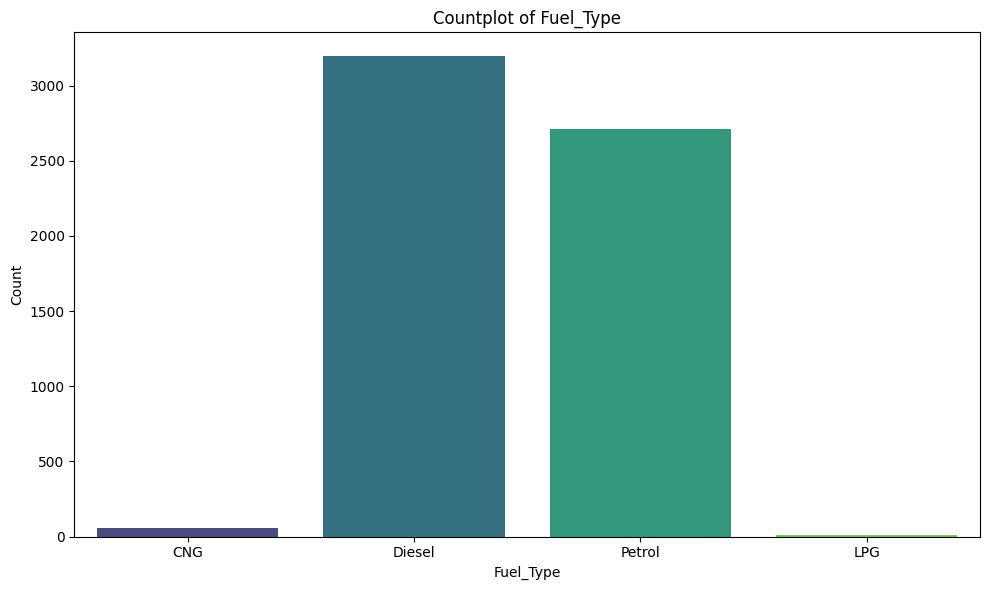

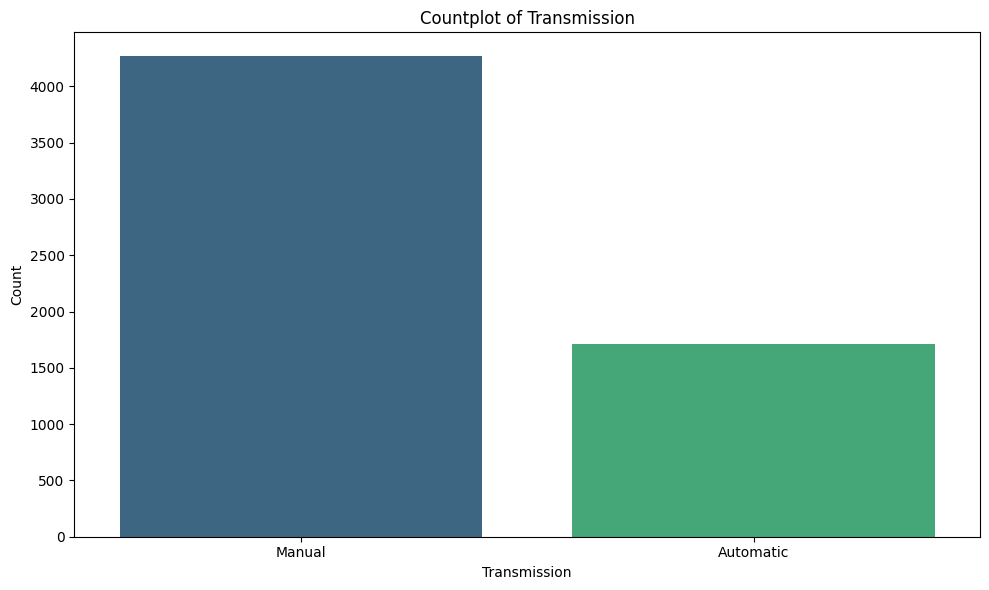

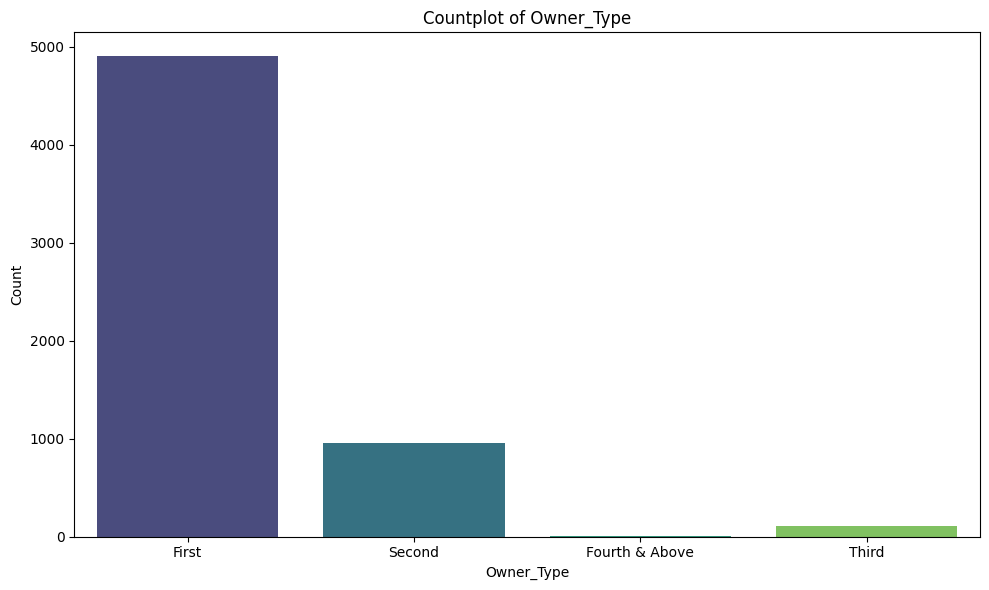

In [26]:
for col in ['Year', 'Seats', 'Fuel_Type', 'Transmission', 'Owner_Type']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

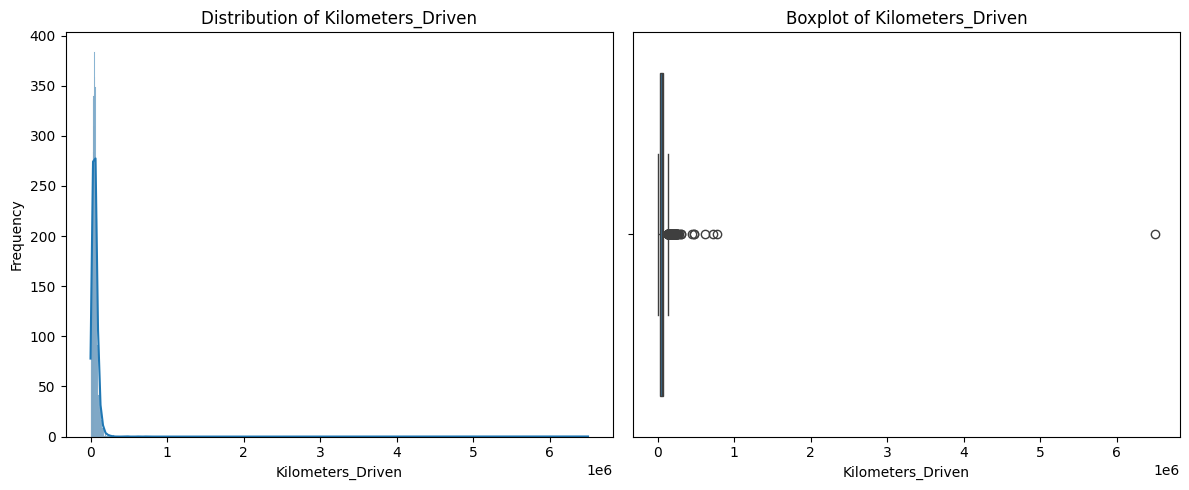

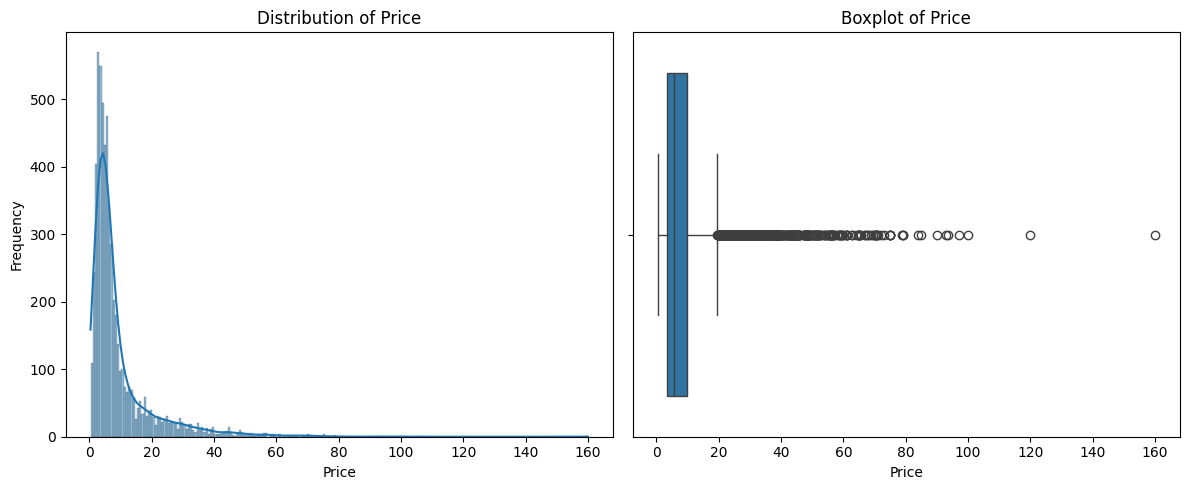

In [27]:
for col in ['Kilometers_Driven', 'Price']:
    plt.figure(figsize=(12, 5))

    # Subplot 1: Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Subplot 2: Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()

For this dataset ưe found one point very interesting for the Name of the vehicle. We noticed that there weren't any rules for vehicle naming, and duting the prediction step, we reconigned that the names of the vehicles in train_data and test_data are very different and not predictable. We check the following:

In [28]:
listtrain = data['Name']
listtest = test['Name']

# prints the missing in listrain
print("Missing values in first list:", (set(listtest).difference(listtrain)))

Missing values in first list: {'Chevrolet Spark 1.0 PS', 'Datsun GO T Petrol', 'Fiat Punto EVO 1.3 Emotion', 'Fiat Avventura Urban Cross 1.3 Multijet Emotion', 'Isuzu MU 7 4x2 HIPACK', 'Honda City i DTec VX Option BL', 'Honda BRV i-DTEC V MT', 'Ford Fiesta Classic 1.6 SXI Duratec', 'Toyota Innova 2.5 LE 2014 Diesel 8 Seater', 'Maruti A-Star Zxi', 'Toyota Etios Liva 1.4 VXD', 'Mahindra Bolero SLX', 'Hyundai Elite i20 Magna Plus', 'Hyundai Creta 1.6 SX Automatic', 'Maruti Ciaz VDi Option SHVS', 'Toyota Innova Crysta Touring Sport 2.4 MT', 'Mahindra KUV 100 G80 K4 Plus 5Str', 'Maruti Vitara Brezza ZDi AMT', 'Skoda Laura L and K MT', 'Maruti Alto XCITE', 'Honda Accord 2001-2003 2.3 VTI L MT', 'Nissan Micra XL CVT', 'Jaguar XF 2.0 Petrol Portfolio', 'Mahindra Thar 4X4', 'Hyundai Elantra GT', 'Maruti Ertiga VXI Petrol', 'Fiat Grande Punto 1.2 Emotion', 'Maruti Celerio X VXI Option', 'Hyundai Santro Xing GLS CNG', 'Hyundai Santro LS zipDrive Euro I', 'Renault Koleos 4X2 MT', 'Skoda Superb Pet

Therefore, we decided to create a new column under the name "Cars" to distinguish the car make & model. We have noticed that some authors have used the coding of vehicle names by specifying each vehicle as a separate code and conducting train and prediction, which is probably not LOGICAL.

In [29]:
data['Cars'] = data['Name'].str.split(" ").str[0] + ' ' +data['Name'].str.split(" ").str[1]
test['Cars'] = test['Name'].str.split(" ").str[0] + ' ' +test['Name'].str.split(" ").str[1]

In [30]:
set(test['Cars']).issubset(set(data['Cars']))

False

Now, check again, and efectively, there are only 7 cars in the test data set are missing from the train data set. Fine, we drop these items.

In [31]:
listtrain = data['Cars']
listtest = test['Cars']

# prints the missing and additional elements in list1
print("Missing values in first list:", (set(listtest).difference(listtrain)))

Missing values in first list: {'OpelCorsa 1.4Gsi', 'Toyota Land', 'Isuzu MU', 'Hindustan Motors', 'Nissan 370Z', 'Bentley Flying', 'Fiat Abarth'}


In [32]:
test.drop(test[test['Cars'].isin(['Toyota Land', 'Hindustan Motors', 'Fiat Abarth', 'Nissan 370Z',
                                  'Isuzu MU', 'Bentley Flying', 'OpelCorsa 1.4Gsi'])].index, inplace = True)

In [33]:
test.shape

(1216, 12)

In [34]:
listtrain = data['Cars']
listtest = test['Cars']

# prints the missing and additional elements in list1
print("Missing values in first list:", (set(listtest).difference(listtrain)))

Missing values in first list: set()


In [35]:
data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
data['Mileage'] = data['Mileage'].str.replace(' km/kg','')
data['Engine'] = data['Engine'].str.replace(' CC','')
data['Power'] = data['Power'].str.replace('null bhp','112')
data['Power'] = data['Power'].str.replace(' bhp','')

test['Mileage'] = test['Mileage'].str.replace(' kmpl','')
test['Mileage'] = test['Mileage'].str.replace(' km/kg','')
test['Engine'] = test['Engine'].str.replace(' CC','')
test['Power'] = test['Power'].str.replace('null bhp','112')
test['Power'] = test['Power'].str.replace(' bhp','')

In [36]:
data['Mileage'] = data['Mileage'].astype(float)
data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].astype(float)

test['Mileage'] = test['Mileage'].astype(float)
test['Mileage'] = test['Mileage'].astype(float)
test['Engine'] = test['Engine'].astype(float)
test['Power'] = test['Power'].astype(float)

In [37]:
data['Kilometers_Driven'].quantile([0.7,0.8,0.9,0.95,0.99,0.995,0.999,1])

,Kilometers_Driven
0.700,68344.20
0.800,79000.00
0.900,96719.00
0.950,120000.00
0.990,172297.00
0.995,202461.34
0.999,445910.00
1.000,6500000.00


In [38]:
test['Kilometers_Driven'].quantile([0.7,0.8,0.9,0.95,0.99,0.995,0.999,1])

,Kilometers_Driven
0.700,70000.00
0.800,80000.00
0.900,99000.00
0.950,124473.50
0.990,174755.65
0.995,195887.50
0.999,271725.00
1.000,350000.00


In [39]:
data['Kilometers_Driven'].quantile(0.999)

np.float64(445910.00000002625)

In [40]:
test['Kilometers_Driven'].quantile(0.999)

np.float64(271725.000000007)

In [41]:
data = data[data['Kilometers_Driven']<data['Kilometers_Driven'].quantile(0.999)]

In [42]:
test = test[test['Kilometers_Driven']<test['Kilometers_Driven'].quantile(0.999)]

In [43]:
def outliers_handling(x, p1=0.25, p2=0.75):
    q1 = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    return x[(x > min_limit) & (x < max_limit)]


for col in ['Engine', 'Power', 'Mileage']:
    data[col] = outliers_handling(data[col])

In [44]:
def outliers_handling(x, p1=0.25, p2=0.75):
    q1 = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    return x[(x > min_limit) & (x < max_limit)]


for col in ['Engine', 'Power', 'Mileage']:
    test[col] = outliers_handling(data[col])

In [45]:
data.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda Jazz


In [46]:
data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,70
Engine,61
Power,238


In [47]:
for col in ['Mileage', 'Engine', 'Power']:
    median_val = data[col].median()
    data[col].fillna(median_val, inplace=True)
    test[col].fillna(median_val, inplace=True) # Also fill missing in test set with train median

In [48]:
print('Missing values in data after imputation:')
display(data.isnull().sum())
print('\nMissing values in test after imputation:')
display(test.isnull().sum())

Missing values in data after imputation:


,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0



Missing values in test after imputation:


,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [49]:
test.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [50]:
data.dtypes

,0
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,float64
Engine,float64
Power,float64


In [51]:
data['Seats'].value_counts()

,count
Seats,
5.0,5006
7.0,674
8.0,134
4.0,99
6.0,31
2.0,16
10.0,5
9.0,3
0.0,1


In [52]:
data.drop(data[data['Seats']==0].index ,axis = 0, inplace= True )

In [53]:
test.drop(test[test['Seats']==0].index ,axis = 0, inplace= True )

In [54]:
data['Seats'].value_counts()

,count
Seats,
5.0,5006
7.0,674
8.0,134
4.0,99
6.0,31
2.0,16
10.0,5
9.0,3


In [55]:
test['Seats'].value_counts()

,count
Seats,
5.0,1028
7.0,120
8.0,36
4.0,19
6.0,7
10.0,3
2.0,1


In [56]:
data.dtypes

,0
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,float64
Engine,float64
Power,float64


In [57]:
test.dtypes

,0
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,float64
Engine,float64
Power,float64


In [58]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000
mean,2013.386729,57117.800268,18.316841,1596.068700,105.707736,5.279993,9.493170
std,3.248117,34127.508604,4.102378,548.100589,39.629745,0.806494,11.188003
min,1998.000000,171.000000,6.400000,624.000000,34.200000,2.000000,0.440000
25%,2011.750000,33889.500000,15.400000,1198.000000,76.975000,5.000000,3.500000
50%,2014.000000,53000.000000,18.200000,1462.000000,91.100000,5.000000,5.650000
75%,2016.000000,72939.750000,21.100000,1968.000000,126.200000,5.000000,9.950000
max,2019.000000,445000.000000,28.400000,2999.000000,227.000000,10.000000,160.000000


In [59]:
feature = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
           'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']
data = pd.DataFrame(data, columns=feature)

feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
test = pd.DataFrame(test, columns=feature1)

# III. EXPLORATORY DATA ANALYSIS

After preprocessing the data, it is analyzed through visual exploration to gather insights about the model that
can be applied to the data, understand the diversity in the data and the range of every field. We use a bar chart, box
plot, distribution graph, etc. to explore each feature varies and its relation with other features including the target
feature.

In [60]:
data.head(3)

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50


Now, let's check the Price first.

Skewness: 3.336341
Kurtosis: 17.132930


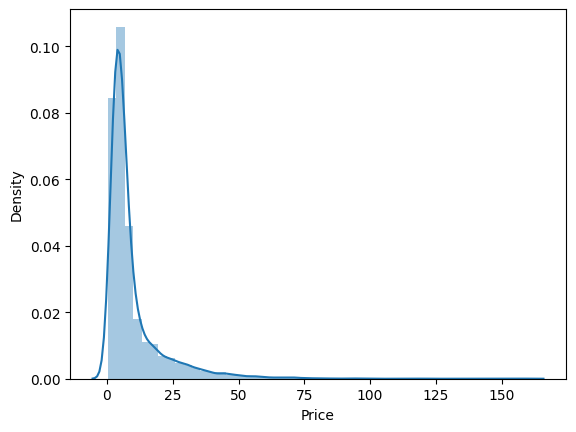

In [61]:
sns.distplot(data['Price'])

print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

We found that converting the value of Price to Log(Price) might be a good solution to have a more normal visualization of the distribution of the Price, however, this alternative has no major or decisive effect on the results of the train and/ or predict procedure in the next section. Therefore, in order not to complicate matters, we decided to keep the whole processed database up to this step to analyze the parameters' correlations and conduct the modeling in the following section.

# RELATIONSHIP OF PRICE WITH OTHER PARAMETER

In [62]:
# Find most important features relative to target Price
print("Find most important features relative to Price-target")
corr = data.select_dtypes(include=np.number).corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)

Find most important features relative to Price-target
Price                1.000000
Engine               0.591365
Power                0.472067
Year                 0.305551
Seats                0.053619
Kilometers_Driven   -0.183954
Mileage             -0.332431
Name: Price, dtype: float64


In [63]:
px.treemap(data.groupby(by='Fuel_Type').sum().reset_index(), path=['Fuel_Type'], labels='Fuel_Type',
           values='Price', title='Price vs Fuel_type')

Wow, Diesel vehicles are the majority, NOT petrole cars.

In [64]:
yprop = 'Price'
xprop = 'Power'
h= 'Fuel_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin",  trendline="ols", template="simple_white")

In [65]:
yprop = 'Price'
xprop = 'Engine'
h= 'Transmission'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", trendline="ols", template="simple_white")

Yeah ! "New" cars are more expensive than "Old" cars, and Automatic cars are more costly.

In [66]:
yprop = 'Price'
xprop = 'Year'
h= 'Owner_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", trendline="ols", template="simple_white")


In [67]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=data['Fuel_Type'], values=data['Price'], hole=.3)])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

# IV. Model Description

To compute the price of vehicles, this work focuses on the use of **supervised learning models**, specifically **Linear Regression** and **Decision Tree Regression**, for predicting used car prices based on multiple vehicle-related features.

## Linear Regression Model
Linear Regression is used as a baseline model to establish a linear relationship between the dependent variable (car price) and a set of independent input features. It is simple, interpretable, and effective when the relationship between variables is approximately linear. The model estimates coefficients for each feature to minimize the error between predicted and actual prices.

## Decision Tree Model
Decision Tree Regression is employed to capture **non-linear relationships** between features and car prices. Unlike linear regression, decision trees split the data into subsets based on feature values, allowing the model to handle complex interactions between variables without requiring feature scaling or linear assumptions.

## Features Used
After removing irrelevant and redundant attributes, the following **eleven (11) features** are used for model training:

- Cars  
- Location  
- Year  
- Kilometers_Driven  
- Fuel_Type  
- Transmission  
- Owner_Type  
- Mileage  
- Engine  
- Power  
- Seats  

These features are selected based on their relevance and contribution to predicting used car prices.

## Dataset
The models are trained and evaluated using a **Kaggle used car dataset**, which contains real-world information on vehicle specifications and prices. Both models are applied to the same dataset to ensure a fair comparison of performance.

## Model Comparison
- **Linear Regression** provides a clear and interpretable baseline for price prediction.
- **Decision Tree Regression** offers improved flexibility and often better accuracy by modeling non-linear patterns in the data.



**A. Data preparation & Model Parameters**

In this Notebook, we do not discuss in deep about the Models' parameters, we just applied the standard or refer to previous recommendations. Let's copy the database.

In [68]:
import copy
df_train=copy.deepcopy(data)
df_test=copy.deepcopy(test)

cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

And then, coding the categorical parameters using LabelEncoder.

In [69]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test = df_test.apply(lambda x: d[x.name].transform(x))
df_train[cols] = data[cols]
df_test[np.delete(cols,len(cols)-1)]=test[np.delete(cols,len(cols)-1)]

In [70]:
ftrain = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
          'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']

def Definedata():
    # define dataset
    data2 = df_train[ftrain]
    X = data2.drop(columns=['Price']).values
    y0 = data2['Price'].values

    # Apply StandardScaler to numerical features
    # Identify numerical columns to scale
    numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
    scaler = StandardScaler()
    X_scaled_numerical = scaler.fit_transform(data2[numerical_cols])

    # Combine scaled numerical features with original encoded categorical features
    categorical_cols_encoded = data2.drop(columns=numerical_cols + ['Price']).values

    # If there are no categorical columns, X_scaled will be just X_scaled_numerical
    if categorical_cols_encoded.size > 0:
        X_scaled = np.hstack((X_scaled_numerical, categorical_cols_encoded))
    else:
        X_scaled = X_scaled_numerical

    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X_scaled, y

In [71]:
df_test.head(2)

,Cars,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,106,4,0,1,0,2014,40929,26.60,998.0,58.16,4.0
1,106,3,3,1,2,2013,54493,19.67,1582.0,126.20,5.0


In [72]:
df_train.head(2)

,Cars,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,124,9,0,1,0,2010,72000,26.60,998.0,58.16,5.0,1.75
1,65,10,1,1,0,2015,41000,19.67,1582.0,126.20,5.0,12.50


**B. Training and Testing**

We split our dataset into training, testing data with a 70:30 split ratio. The splitting was done by picking at random which results in a balance between the training data and testing data amongst the whole dataset. This is done to avoid overfitting and enhance generalization. Finaly, we selected 11 characters in the dataset to train the model.

Now, we create different functions to calculate deviations, important features and graphical illustration.

In [73]:
def Models(models):

    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)

    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp



Firstly, take a quick look at the correlation matrix.

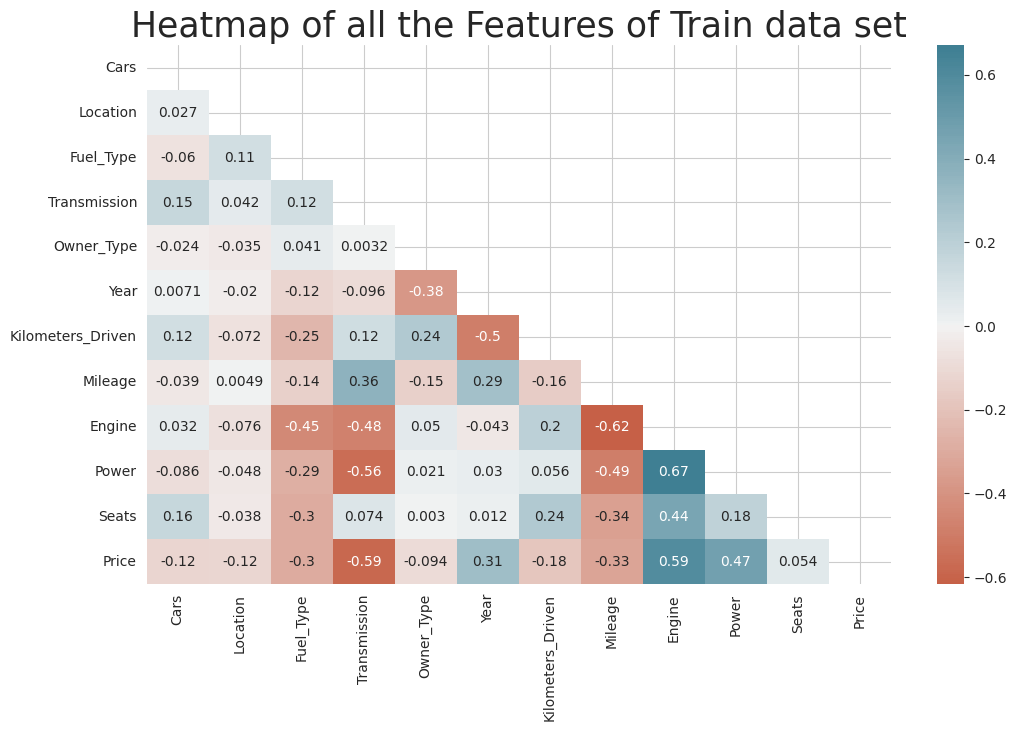

In [74]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

**C. Models comparison**

The model score is the coefficient of determination R2 of the prediction. In total, we have examinated 2 models to train/predict the used cars price.

In [75]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [76]:
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

regressors = [['DecisionTreeRegressor',DecisionTreeRegressor(max_depth=10)], # Added max_depth to prevent overfitting
              ['LinearRegression', LinearRegression()]
             ]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    MSE = metrics.mean_squared_error(y_test, y_pred) # Calculate Mean Squared Error
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test) # This is the R2 score for regressors

    Acc = pd.concat([Acc, pd.DataFrame([{'model':name, 'Root Mean Squared  Error': RMSE, 'Mean Squared Error': MSE, 'Accuracy on Traing set':ATrS,'R2 ':ATeS}])], ignore_index=True )

In [77]:
if 'Accuracy on Testing set' in Acc.columns:
    Acc = Acc.drop(columns=['Accuracy on Testing set'])

Acc = Acc.drop_duplicates(subset=['model'], keep='last')

filtered_acc = Acc[Acc['model'].isin(['LinearRegression', 'DecisionTreeRegressor'])]
display(filtered_acc)

,model,Root Mean Squared Error,Accuracy on Traing set,Mean Squared Error,R2
0,DecisionTreeRegressor,121.714277,0.967092,14814.365153,0.882728
1,LinearRegression,148.861049,0.820308,22159.611796,0.824582


- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://www.statology.org/linear-regression-assumptions/
- https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction/data